# Project Name: Flight Passengers Prediction: Regression Technique
The main aim of this project is to predict the Passengers count based on various features

1. Loading the Raw Data
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
          a. Data Cleansing/wrangling/munging
          b. Feature Engineering (Scaling, Encoding) with Pipeline
          c. Split Dataset into Training set and Test set
4. Model building
          a. Select and Train a few Algorithms(Linear Regression, Decision Tree, RandomForest)
5. Evaluating the Model
          a. Mean Squared Error
          b. Cross Validation
          c. Log Loss
6. Hyper Parameter Tuning
         a. Final Model with Selected Parameters
7. Model Testing
8. Save Model(Pickel)
8. Model Deployment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_df = pd.read_csv('./AirPassengers.csv') 

In [3]:
df = raw_df.loc[:75, :]

In [4]:
df.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


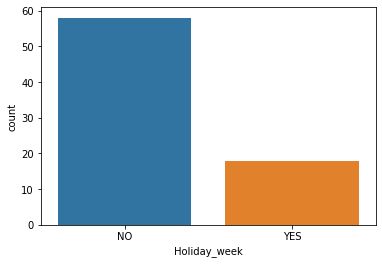

In [5]:
sns.countplot(x='Holiday_week', data = df)

In [6]:
df.shape

(76, 9)

### Exploratory Data Analysis
1. Find Duplicate Values
2. Find Missing Values
3. Find Features with one value
4. Explore the Categorical Features
5. Find Categorical Feature Distribution
6. Relationship between Categorical Features and Label
7. Explore the Numerical Features
8. Find Discrete Numerical Features
9. Relation between Discrete numerical Features and Labels
10. Find Continous Numerical Features
11. Distribution of Continous Numerical Features
12. Relation between Continous numerical Features and Labels
13. Find Outliers in numerical features
14. Explore the Correlation between numerical features

1. Find Duplicate Values 

In [7]:
df.duplicated().sum()

0

2. Find Missing Values 

In [8]:
df.isna().sum().sum()

0

3. Find Features with one value

In [9]:
df.nunique()

Week_num                        76
Passengers                      73
Promotion_Budget                76
Service_Quality_Score           76
Holiday_week                     2
Delayed_Cancelled_flight_ind     2
Inter_metro_flight_ratio        43
Bad_Weather_Ind                  2
Technical_issues_ind             2
dtype: int64

4. Explore the Categorical Features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
Week_num                        76 non-null int64
Passengers                      76 non-null int64
Promotion_Budget                76 non-null int64
Service_Quality_Score           76 non-null float64
Holiday_week                    76 non-null object
Delayed_Cancelled_flight_ind    76 non-null object
Inter_metro_flight_ratio        76 non-null float64
Bad_Weather_Ind                 76 non-null object
Technical_issues_ind            76 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 5.5+ KB


5. Find Categorical Feature Distribution

In [11]:
cat_feats = [feature for feature in df.columns if df[feature].dtypes =='O']
cat_feats

['Holiday_week',
 'Delayed_Cancelled_flight_ind',
 'Bad_Weather_Ind',
 'Technical_issues_ind']

In [12]:
cat_df = pd.DataFrame([], columns=['Feature', 'No', 'Yes'])

for feat in cat_feats:
    var = df.groupby(feat)['Passengers'].sum()
    row = {'Feature':feat, 'No':var[0], 'Yes':var[1]}
    cat_df = cat_df.append(row, ignore_index = True)
cat_df

,Feature,No,Yes
0,Holiday_week,2288414,1081986
1,Delayed_Cancelled_flight_ind,1649732,1720668
2,Bad_Weather_Ind,1695276,1675124
3,Technical_issues_ind,1863732,1506668


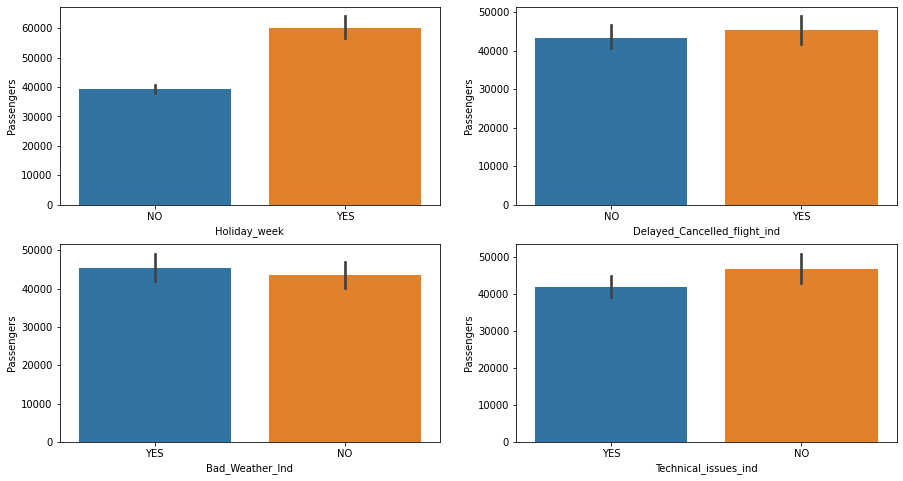

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for n, feat in enumerate(cat_feats):
    sns.barplot(x=feat, y='Passengers', data=df, ax=ax[n//2][n%2])

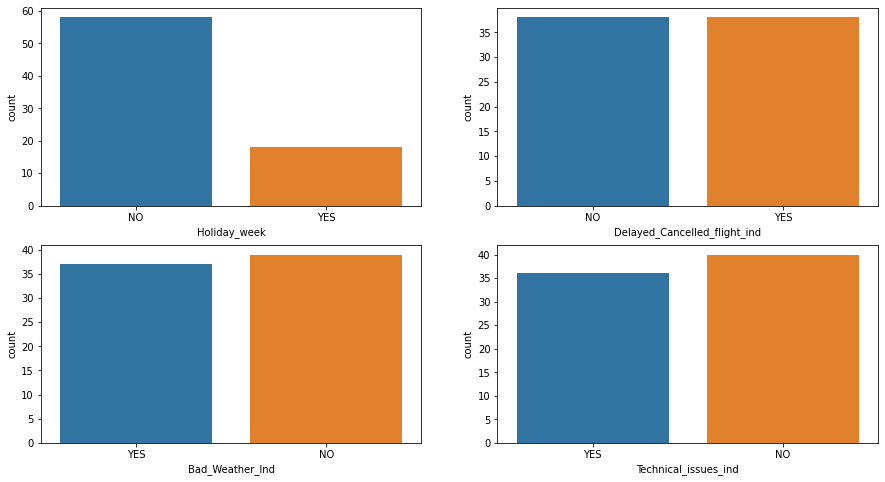

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for n, feat in enumerate(cat_feats):
    sns.countplot(x=feat, data=df, ax=ax[n//2][n%2])

6. Relationship between Categorical Features and Label

### Take-Away



7. Explore the Numerical Features

In [15]:
#num_feats = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_feats = list(set(df.columns) - set(cat_feats) - {'Passengers'})
num_feats

['Promotion_Budget',
 'Week_num',
 'Inter_metro_flight_ratio',
 'Service_Quality_Score']

8. Find Discrete Numerical Features

In [16]:
discrete_feats=[feature for feature in num_feats if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feats)))

Discrete Variables Count: 0


9. Relation between Discrete numerical Features and Labels

### Take-away:

no discrete varaible found

10. Find Continous Numerical Features

In [17]:
continuous_feats=[feature for feature in num_feats if feature not in discrete_feats+['Passengers']]
print("Continuous feature: {}".format(continuous_feats))

Continuous feature: ['Promotion_Budget', 'Week_num', 'Inter_metro_flight_ratio', 'Service_Quality_Score']


11. Distribution of Continous Numerical Features

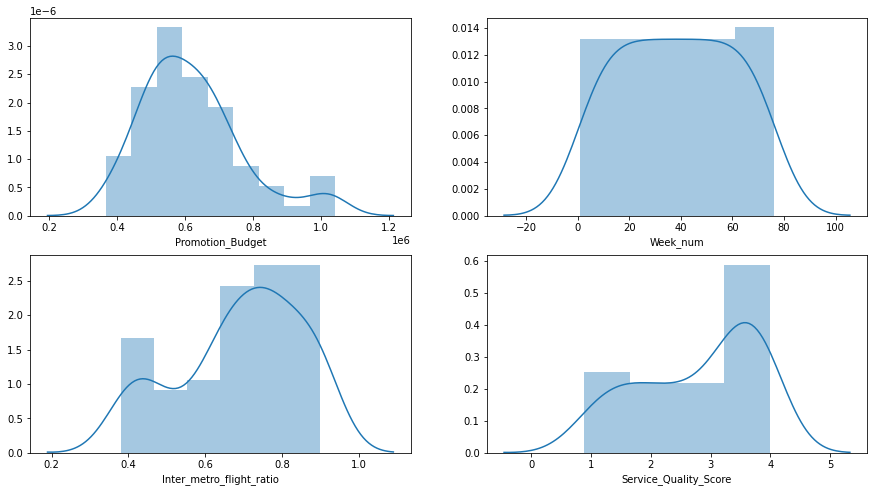

In [18]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
for n, feat in enumerate(num_feats):
    sns.distplot(df[feat], ax=ax[n//2][n%2])

12. Relation between Continous numerical Features and Labels

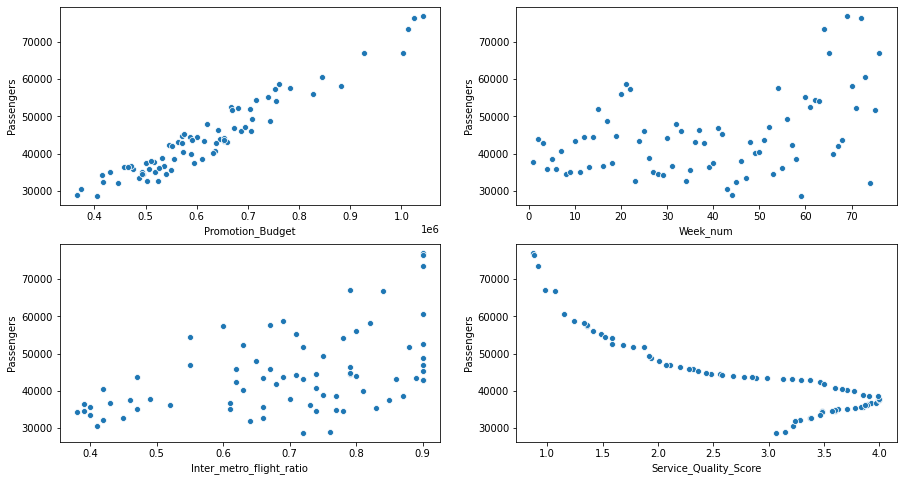

In [19]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
for n, feat in enumerate(num_feats):
    sns.scatterplot(x=df[feat], y='Passengers', data=df, ax=ax[n//2][n%2])

13. Find Outliers in numerical features

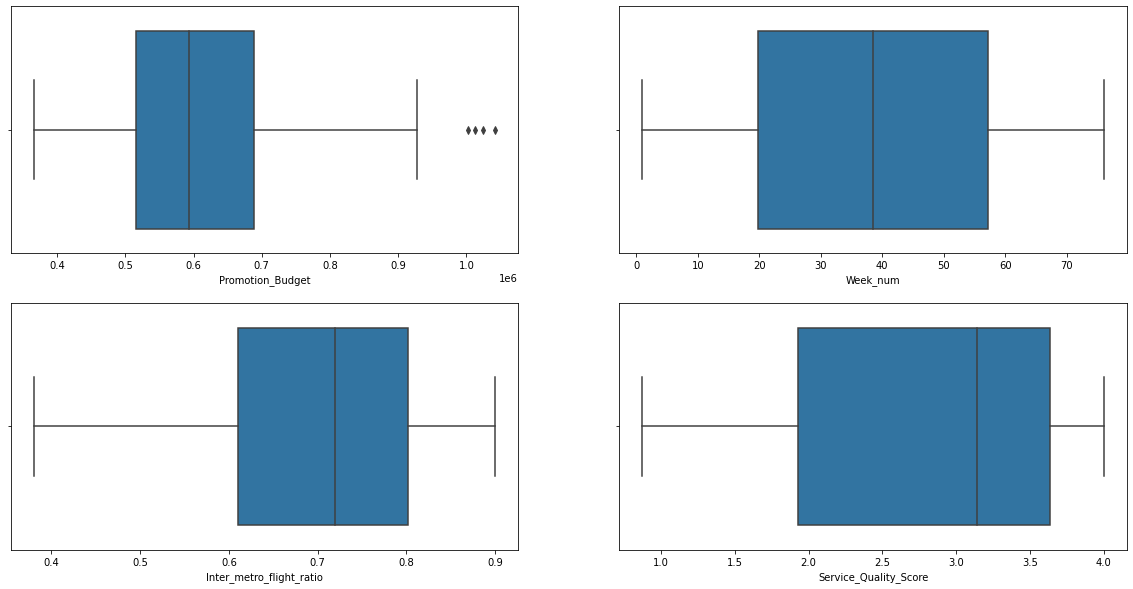

In [20]:
fig, ax = plt.subplots(2,2, figsize=(20,10))
for n, feat in enumerate(num_feats):
    sns.boxplot(x=df[feat], ax=ax[n//2][n%2])

In [21]:
def outliers(ds):
    def outliers_iqr(ys):
        quartile_1, quartile_3 = np.percentile(ys, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        return np.where((ys > upper_bound) | (ys < lower_bound))
    
    
    for i in ds:
        if (ds[i].dtypes == 'float64' or ds[i].dtypes == 'int64'):
            out=list(outliers_iqr(ds[i]))
            if out[0].size:
                print("*****************************************")
                print("Variable \"", i ,"\" has following ", len(out[0]), " outliers, which is ", (len(out[0])/len(ds[i]))*100," %.")
                #for j in out[0]:
                #    print("        Outlier value at",j,"th position is", ds[i].loc[j])
                print("Outlier at 5% ", (np.percentile(ds[i],[5]))[0])
                print("Outlier at 95% ", (np.percentile(ds[i],[95]))[0])
outliers(df)

*****************************************
Variable " Passengers " has following  3  outliers, which is  3.9473684210526314  %.
Outlier at 5%  32208.5
Outlier at 95%  66983.0
*****************************************
Variable " Promotion_Budget " has following  4  outliers, which is  5.263157894736842  %.
Outlier at 5%  415810.5
Outlier at 95%  946522.5


14. Explore the Correlation between numerical features

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

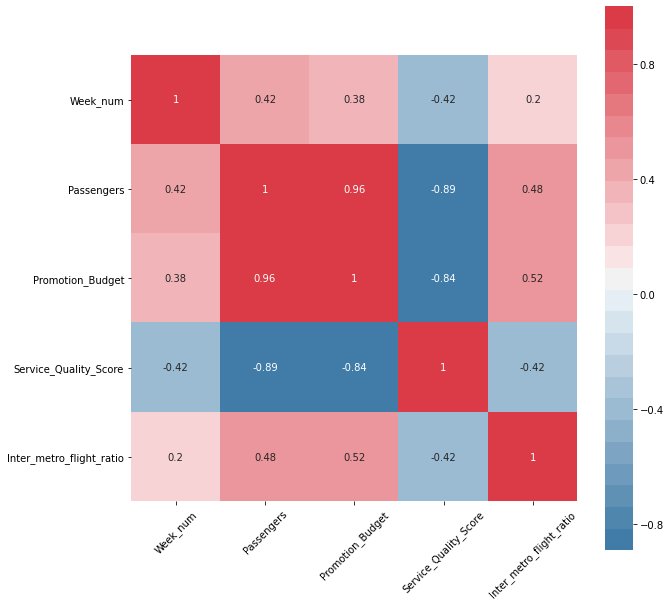

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(df.corr(), 
            annot=True,
            cmap=sns.diverging_palette(240, 10, n=25), 
            square=True, ax=ax)
plt.xticks(rotation=45)

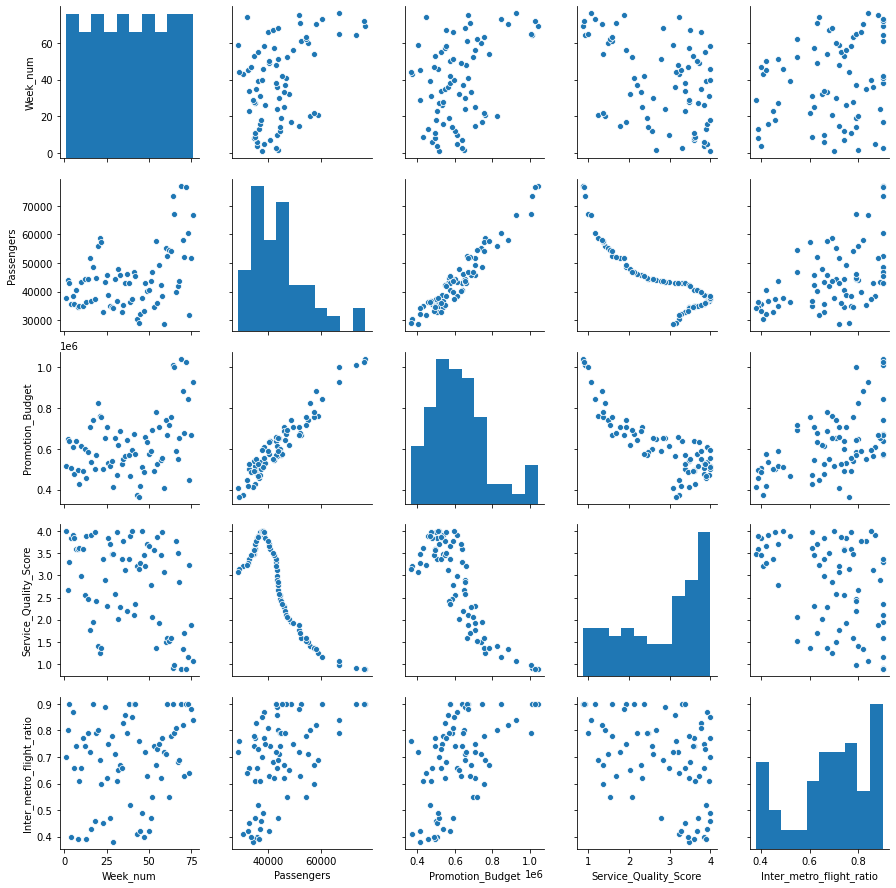

In [23]:
sns.pairplot(df)

## 3. Data Preprocessing   
### a. Data Cleansing/wrangling/munging
        
    Handle Missing Values
        
    Remove Outliers
        
        As per Exploratory Data Analysis EDA
        
            No missing value found

            Passengers and Promotion_Budget columns have outliers

def outliers_treatment(ds):
    def outliers_iqr(ys):
        quartile_1, quartile_3 = np.percentile(ys, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        return np.where((ys > upper_bound) | (ys < lower_bound))
    
    
    for i in ds:
        if (ds[i].dtypes == 'float64' or ds[i].dtypes == 'int64'):
            out=list(outliers_iqr(ds[i]))
            if out[0].size:
                #print("*****************************************")
                #print("Variable \"", i ,"\" has following ", len(out[0]), " outliers, which is ", (len(out[0])/len(ds[i]))*100," %.")
                #for j in out[0]:
                #    print("        Outlier value at",j,"th position is", ds1[i].loc[j])
                print("Outlier at 5% ", (np.percentile(ds[i],[5]))[0])
                print("Outlier at 95% ", (np.percentile(ds[i],[95]))[0])
                if((len(out[0])/len(ds[i]))*100 > 1):
                    lower_bound=(np.percentile(ds[i],[5]))[0]
                    upper_bound=(np.percentile(ds[i],[95]))[0]
                    ds[i][ds[i] <= lower_bound]=lower_bound
                    ds[i][ds[i] >= upper_bound]=upper_bound
                elif((len(out[0])/len(ds[i]))*100 <= 1):
                    median_value=ds[i].median()
                    lower_bound=(np.percentile(ds[i],[5]))[0]
                    upper_bound=(np.percentile(ds[i],[95]))[0]
                    ds[i][ds[i] <= lower_bound]=median_value
                    ds[i][ds[i] >= upper_bound]=median_value
outliers_treatment(df)                  

### b. Feature Engineering with Pipeline
 
    Drop unwanted Features
    
    Handle Feature Scalling
    
    Handle Categorical Features

these is no unwanted column present in given dataset to remove

All categorical features have two unique values(Binary Encoding)

In [24]:
#X = df[cat_feats + num_feats]
#y = df['Passengers']

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [27]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_feats: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    num_pipeline = Pipeline([
                            ('selector', DataFrameSelector(num_feats)),
                            ('std_scaler', StandardScaler())
                        ])
    return num_pipeline

def cat_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_feats: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    cat_pipeline = Pipeline([
                            ('selector', DataFrameSelector(cat_feats)),
                            ("cat", OneHotEncoder()),
                        ])
    return cat_pipeline


def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        df: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    num_pipeline = num_pipeline_transformer(data)
    cat_pipeline = cat_pipeline_transformer(data)
    full_pipeline = FeatureUnion(transformer_list=[
                                ('num_pipeline', num_pipeline),
                                ('cat_pipeline', cat_pipeline)
                            ])
    return full_pipeline.fit_transform(data)

In [28]:
#X_prep = pipeline_transformer(X)

### Split Dataset into Training set and Test set

In [29]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_prep,y,test_size=0.2, random_state=0)

## 4.Model Selection using GridSearchCV 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
def dv_data_preprocess(df):
    X = df[cat_feats + num_feats]
    y = df['Passengers']
    X_prep = pipeline_transformer(X)
    X_train, X_test, y_train, y_test = train_test_split(X_prep,y,test_size=0.2, random_state=0)
    
    return X_train, X_test, y_train, y_test

In [32]:
X_train, X_test, y_train, y_test = dv_data_preprocess(df)

In [33]:
def pr_data_preprocess(df):
    X = df[cat_feats + num_feats]
    y = df['Passengers']
    X_prep = pipeline_transformer(X)
    
    return X_prep, y

In [34]:
def find_best_model_using_gridsearchcv(X,y): 
    algos = {
        'Linear_Regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'DecisionTreeRegressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'RandomForestRegressor': {
            'model':  RandomForestRegressor(),
            'params': {
                'n_estimators': [3, 10, 30],
                'max_features': [2, 4, 6, 8]
        
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model': algo_name,
            'Best_Score': gs.best_score_,
            'Best_Params': gs.best_params_,
            'Best_Model':gs.best_estimator_
        })
        model_df = pd.DataFrame(scores,columns=['Model','Best_Score','Best_Params','Best_Model'])
    return model_df


model_df = find_best_model_using_gridsearchcv(X_train,y_train)
model_df

#model_df[model_df['Best_Score'].max()
model_df.iloc[:,:].max()

def model(X,y):
    df = find_best_model_using_gridsearchcv(X,y)
    model = df.loc[df['Best_Score'].idxmax()]
    reg = model['Best_Model']
    
    return reg

In [35]:
model_df = find_best_model_using_gridsearchcv(X_train,y_train)
model = model_df.loc[model_df['Best_Score'].idxmax()]
reg = model['Best_Model']

C:\Users\Nag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52436578.5951766, tolerance: 404716.0742666667
  max_iter, tol, rng, random, positive)


In [36]:
def reg_model(X_train, y_train, X_test, y_test):
    scores = []
    reg.fit(X_train, y_train)
    train_pred= reg.predict(X_train)
    train_score = reg.score(X_train,y_train)
    test_pred= reg.predict(X_test)
    test_score = reg.score(X_test,y_test)
    scores.append({
            'Train_Score': train_score,
            'Test_Score': test_score
        })
    Score = pd.DataFrame(scores,columns=['Train_Score', 'Test_Score'])
    return Score

In [37]:
reg_model(X_train, y_train, X_test, y_test)

,Train_Score,Test_Score
0,1.0,0.975035


In [38]:
dup_df = raw_df.iloc[75:80, : ]

In [45]:
def final_model(df):
    X, y = pr_data_preprocess(df)
    y = reg.predict(X)
    score = reg.score(X,y)
    act = raw_df.loc[75:80, ['Passengers'] ]
    lin_mse = mean_squared_error(act, y)
    lin_rmse = np.sqrt(lin_mse)
    
    return y, score, lin_rmse

In [46]:
final_model(dup_df)

(array([54474., 54474., 34496., 32018., 37936.]), 1.0, 14808.432003422915)